In [1]:
import matplotlib.pyplot as plt
import regions
from astropy import units as u
from astropy.coordinates import SkyCoord
from mocpy import MOC

# Creating MOCs out of [astropy-regions](https://github.com/astropy/regions).

The supported astropy regions are:
- regions.CircleSkyRegion
- regions.CircleAnnulusSkyRegion
- regions.EllipseSkyRegion
- regions.RectangleSkyRegion
- regions.PolygonSkyRegion
- regions.PointSkyRegion

The resulting MOCs will always be the smallest MOC of the required order ( chosen with
`max_depth`) that entirely contains the region.

## Circles

In [2]:
center = SkyCoord(42, 43, unit="deg", frame="fk5")
circle = regions.CircleSkyRegion(center, radius=3 * u.deg)
moc_circle = MOC.from_astropy_regions(circle, max_depth=8)

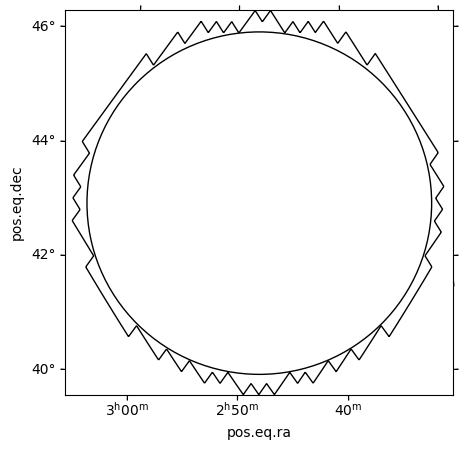

In [3]:
fig = plt.figure(figsize=(5, 5))
wcs = moc_circle.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_circle.border(ax, wcs)
circle.to_pixel(wcs).plot();

## Rings

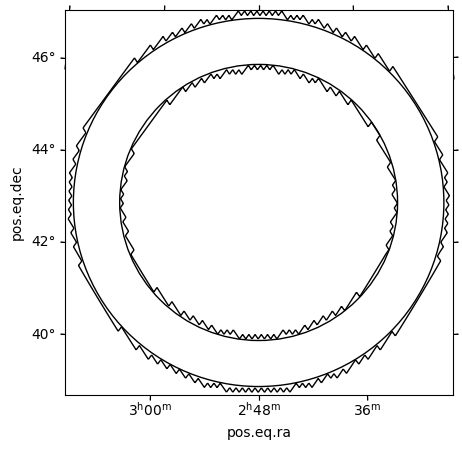

In [4]:
ring = regions.CircleAnnulusSkyRegion(center, 3 * u.deg, 4 * u.deg)
moc_ring = MOC.from_astropy_regions(ring, max_depth=9)

fig = plt.figure(figsize=(5, 5))
wcs = moc_ring.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_ring.border(ax, wcs)
ring.to_pixel(wcs).plot();

## Ellipses

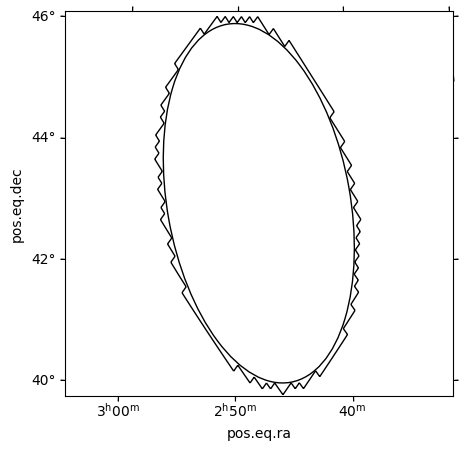

In [5]:
ellipse = regions.EllipseSkyRegion(center, 3 * u.deg, 6 * u.deg, 10 * u.deg)
moc_ellipse = MOC.from_astropy_regions(ellipse, max_depth=9)

fig = plt.figure(figsize=(5, 5))
wcs = moc_ellipse.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_ellipse.border(ax, wcs)
ellipse.to_pixel(wcs).plot();

## Rectangles/Box

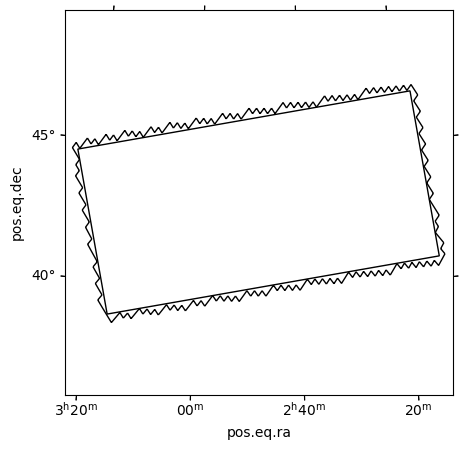

In [6]:
box = regions.RectangleSkyRegion(center, 12 * u.deg, 6 * u.deg, 10 * u.deg)
moc_box = MOC.from_astropy_regions(box, max_depth=8)

fig = plt.figure(figsize=(5, 5))
wcs = moc_box.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_box.border(ax, wcs)
box.to_pixel(wcs).plot();

## Polygons

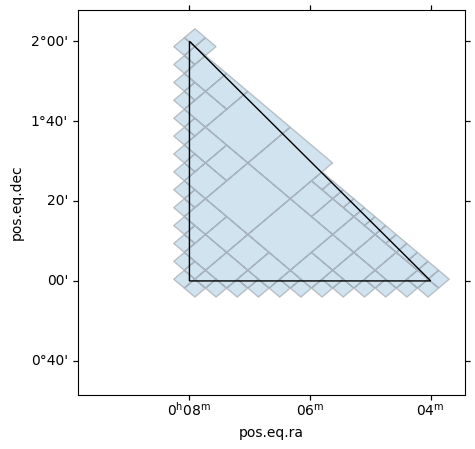

In [7]:
vertices = SkyCoord([1, 2, 2], [1, 1, 2], unit="deg", frame="fk5")

polygon = regions.PolygonSkyRegion(vertices)
moc_polygon = MOC.from_astropy_regions(polygon, max_depth=10)

fig = plt.figure(figsize=(5, 5))
wcs = moc_polygon.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_polygon.fill(ax, wcs, alpha=0.2)
polygon.to_pixel(wcs).plot();

## Points

This will return the HEALPix cell that contains the point at the requested order
(here it's the cell 3663728 at order 10).

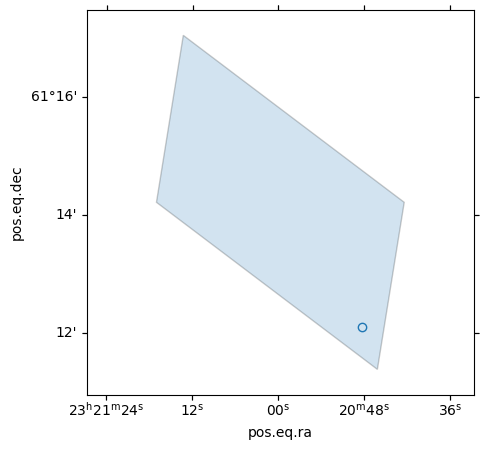

In [8]:
point = SkyCoord("+23h20m48.3s +61d12m06s")

point = regions.PointSkyRegion(point)
moc_point = MOC.from_astropy_regions(point, max_depth=10)

fig = plt.figure(figsize=(5, 5))
wcs = moc_point.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_point.fill(ax, wcs, alpha=0.2)
point.to_pixel(wcs).plot();

In [9]:
moc_point

10/3663728 